In [33]:
cd ..

e:\


This notebook serves as an explanation to what preprocessing does. First we open the image and convert it to grayscale. 

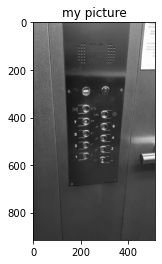

In [34]:
import cv2
import imutils
from opencv import preprocess
from imutils import contours
from matplotlib import pyplot as plt
image = cv2.imread(r'E:\GoogleDriveSync\BREACH_RIDES_ELEVATOR\breach_rides_elevator\main\opencv\data\test_data\a2.png', cv2.COLOR_BGR2RGB)
image = preprocess.adjust_brightness_dynamic(image, brightness=0.0, contrast=0.0)
gray = preprocess.grayscale(image)
color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(gray, cmap="gray")
plt.title('my picture')
plt.show()


We apply a median filter to get rid of potential salt and pepper noise.

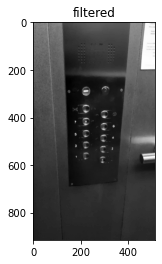

In [35]:
median_filtered = preprocess.median_filter(gray, kernelsize=5)
plt.imshow(median_filtered, cmap="gray")
plt.title('filtered')
plt.show()

Afterwards, an auto-canny edge detector from imutils is used to get the edges of the image.

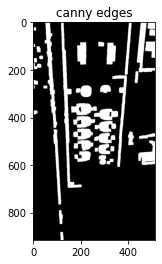

In [36]:
edges = preprocess.canny_edge_extraction(median_filtered.copy(), sigma = 0.33,dilate_iterations=5,erode_iterations=0)
plt.imshow(edges, cmap="gray")
plt.title('canny edges')
plt.show()

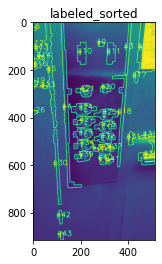

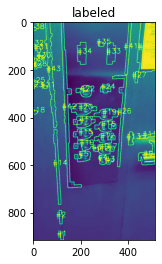

In [37]:
orig_label, sort_label, cnts, cnts_ordered = preprocess.candidate_extraction(median_filtered.copy(), edges)
plt.imshow(sort_label)
plt.title('labeled_sorted')
plt.show()
plt.imshow(orig_label)
plt.title('labeled')
plt.show()

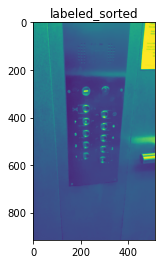

In [63]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(11,11))
img = preprocess.adjust_brightness_dynamic(median_filtered, brightness=0.3, contrast=0.9)
dilated = cv2.dilate(img, kernel)
edges = preprocess.canny_edge_extraction(dilated.copy(), sigma = 0.8,dilate_iterations=2,erode_iterations=1)
cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
for __, cnt in enumerate(cnts):
    image_str = cv2.drawContours(img, cnt, 0, (0, 0, 255), 2)
plt.imshow(image_str)
plt.title('labeled_sorted')
plt.show()
